<h1><center><strong>San Francisco Crime Classification Data Analysis</strong></center></h1>

Contributors:
- Kevin Reynolds
- Shivani Merchant
- Kyrsti Fitts
- Ryan Espejo

# Data Preprocessing 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings


# Silence warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Load training data and assign names to attributes
training_attribute_names = ["Dates", "Category", "Descript", "DayOfWeek", "PdDistrict", "Resolution", "Address", "X", "Y"]
training_data = pd.read_csv('data/train.csv', skiprows=1, names=training_attribute_names)

training_data.head()



,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Category Correlation Heat Map

Using a heat map to show the intensity of correlation between categories

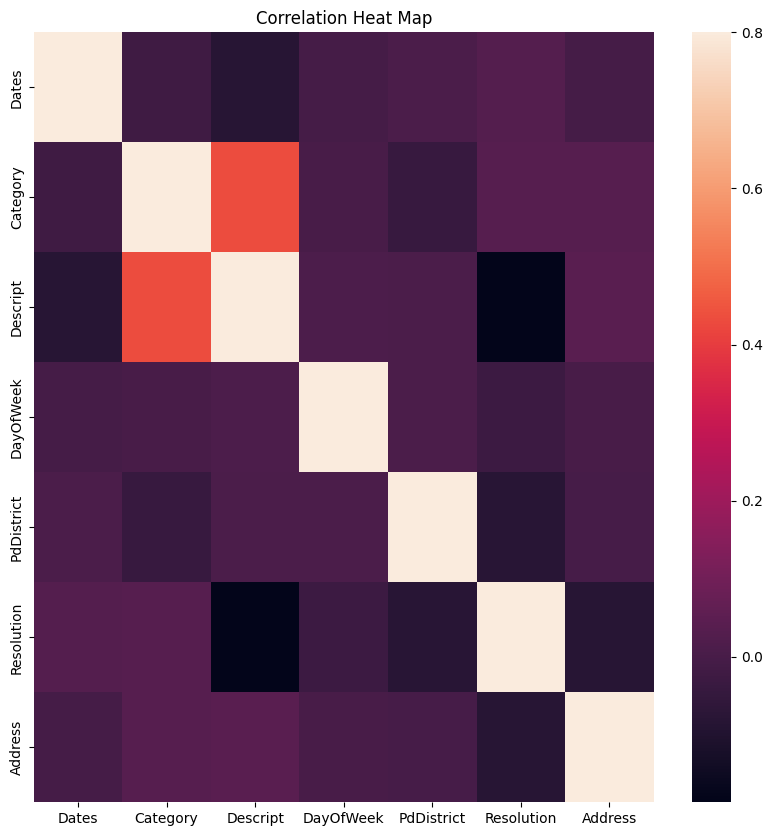

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

d = defaultdict(LabelEncoder)
train_data_encode = training_data.apply(lambda x: d[x.name].fit_transform(x))
train_data_encode = train_data_encode.drop(['X', 'Y'], axis = 1)

mat = train_data_encode.corr()
f, ax = plt.subplots(figsize=(10, 10))
plot2 =sns.heatmap(mat, vmax=.8);
plot2.axes.set_title('Correlation Heat Map')
plt.show()

Category Counts

Visualizing the count of crimes by the category and the number of counts in each category with a bar graph

Category
LARCENY/THEFT                  19.919162
OTHER OFFENSES                 14.370724
NON-CRIMINAL                   10.512397
ASSAULT                         8.755320
DRUG/NARCOTIC                   6.146696
VEHICLE THEFT                   6.125057
VANDALISM                       5.093679
WARRANTS                        4.807704
BURGLARY                        4.185985
SUSPICIOUS OCC                  3.577705
MISSING PERSON                  2.959858
ROBBERY                         2.619444
FRAUD                           1.899552
FORGERY/COUNTERFEITING          1.208247
SECONDARY CODES                 1.137180
WEAPON LAWS                     0.974319
PROSTITUTION                    0.852344
TRESPASS                        0.834350
STOLEN PROPERTY                 0.517055
SEX OFFENSES FORCIBLE           0.499744
DISORDERLY CONDUCT              0.492000
DRUNKENNESS                     0.487444
RECOVERED VEHICLE               0.357383
KIDNAPPING                      0.266614
DRIVING

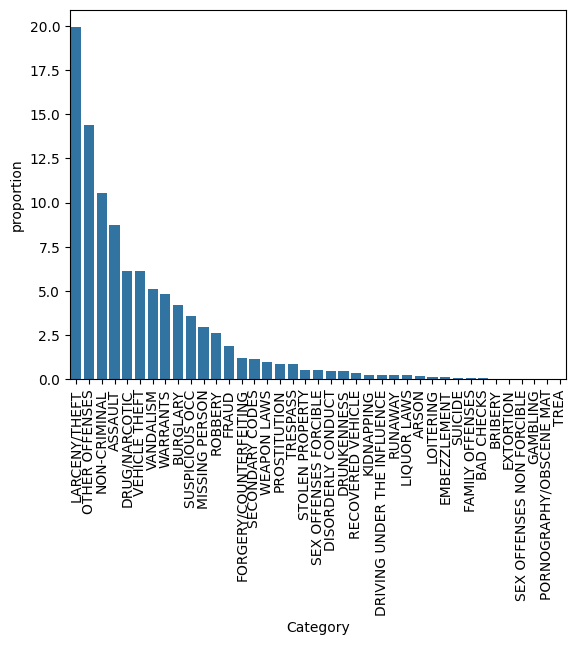

In [3]:
relevant_data = ["Dates", "DayOfWeek", "PdDistrict", "Address", "Category"]
training_data = training_data[relevant_data]
category_counts = training_data['Category'].value_counts(normalize=True) * 100

bar_plot = sns.barplot(x = category_counts.index, y = category_counts)
bar_plot.set_xticklabels(category_counts.index, rotation = 90)

print(category_counts);

Bar Graph to show the amount of crimes now grouped by the district instead of the crime category

PdDistrict
SOUTHERN      17.901279
MISSION       13.656185
NORTHERN      11.992041
BAYVIEW       10.185195
CENTRAL        9.732942
TENDERLOIN     9.317134
INGLESIDE      8.979567
TARAVAL        7.470654
PARK           5.616201
RICHMOND       5.148801
Name: proportion, dtype: float64


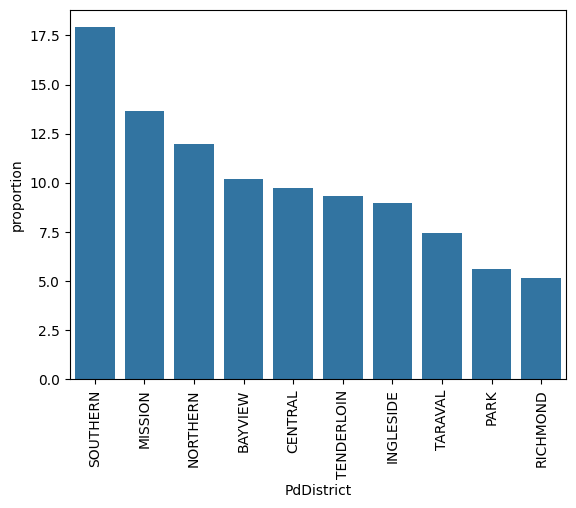

In [4]:
district_counts = training_data['PdDistrict'].value_counts(normalize=True) * 100

pd_bar_plot = sns.barplot(x = district_counts.index, y = district_counts)
pd_bar_plot.set_xticklabels(district_counts.index, rotation = 90)

print(district_counts);

Heat map to compare the regularity of crime category with the district

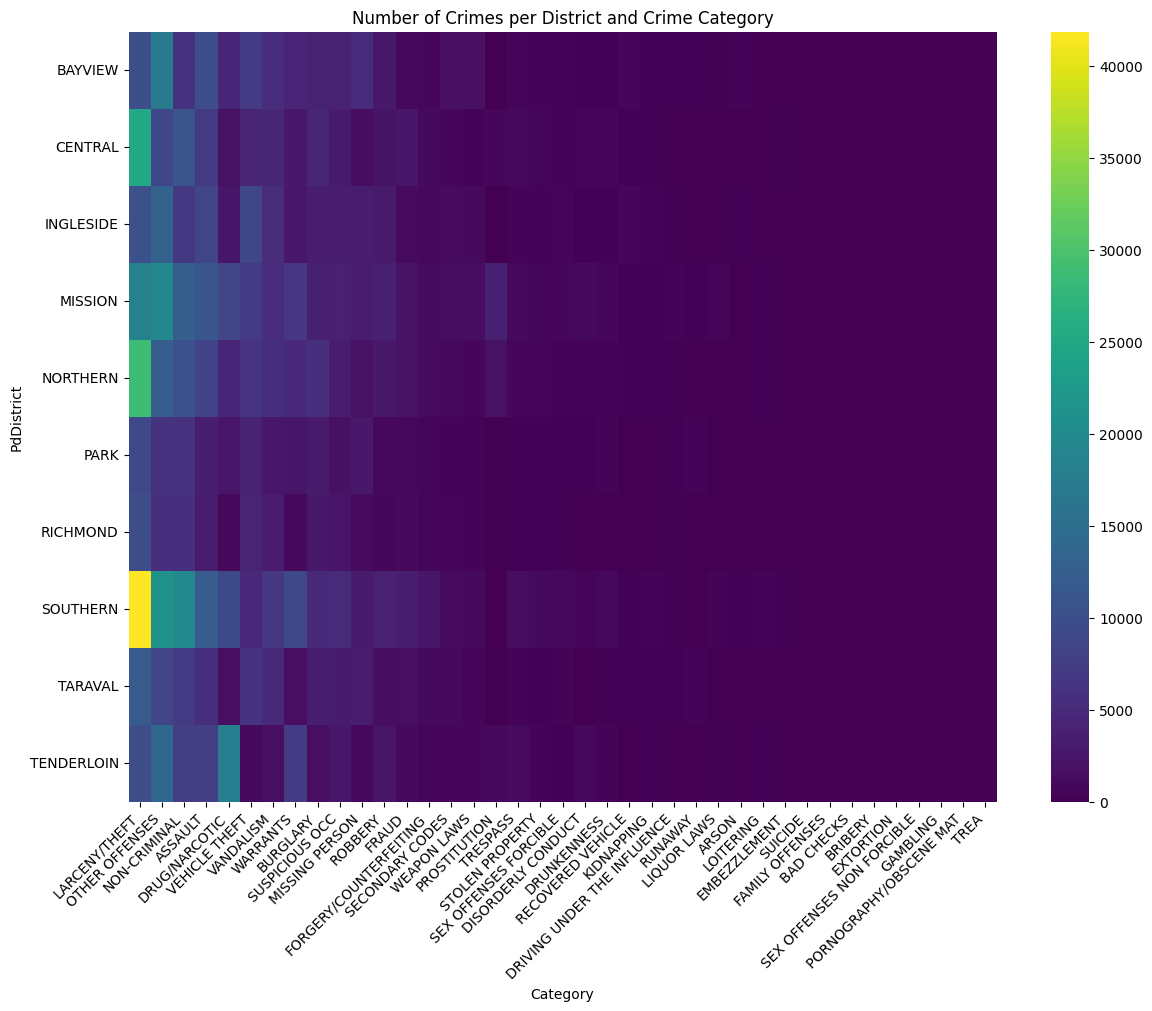

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already defined 'relevant_data' and 'training_data'

# Extract relevant data for Category and PdDistrict
category_counts = training_data['Category'].value_counts(normalize=True) * 100
district_counts = training_data.groupby(['PdDistrict', 'Category']).size().unstack().fillna(0)

# Create a pivot table to get the counts of crimes per district and crime category
crime_pivot_table = pd.pivot_table(training_data, index="PdDistrict", columns="Category", aggfunc=len, fill_value=0)["Dates"]

# Reorder the columns based on the order of crime categories in 'category_counts'
crime_pivot_table = crime_pivot_table[category_counts.index]

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(crime_pivot_table, cmap='viridis')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per District and Crime Category')
plt.show()

Bar plot for time

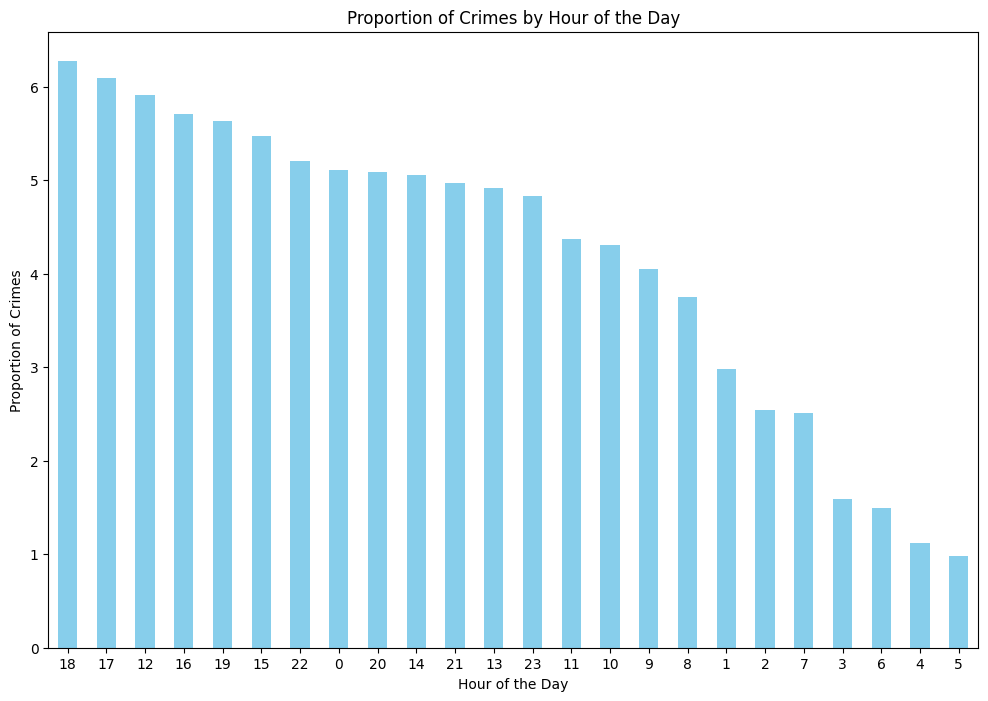

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'training_data' with a 'Dates' column
# Convert the 'Dates' column to datetime format
training_data['Dates'] = pd.to_datetime(training_data['Dates'])

# Extract the hour information and create a new column
training_data['Hour'] = training_data['Dates'].dt.hour

# Count the number of crimes for each hour
crimes_by_hour = training_data['Hour'].value_counts(normalize=True) * 100

# Plotting the data on a bar chart
plt.figure(figsize=(12, 8))
crimes_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Crimes')
plt.title('Proportion of Crimes by Hour of the Day')
plt.xticks(rotation=0)
plt.show()

Heat map comparing the time of the crimes committed with the category of times committed

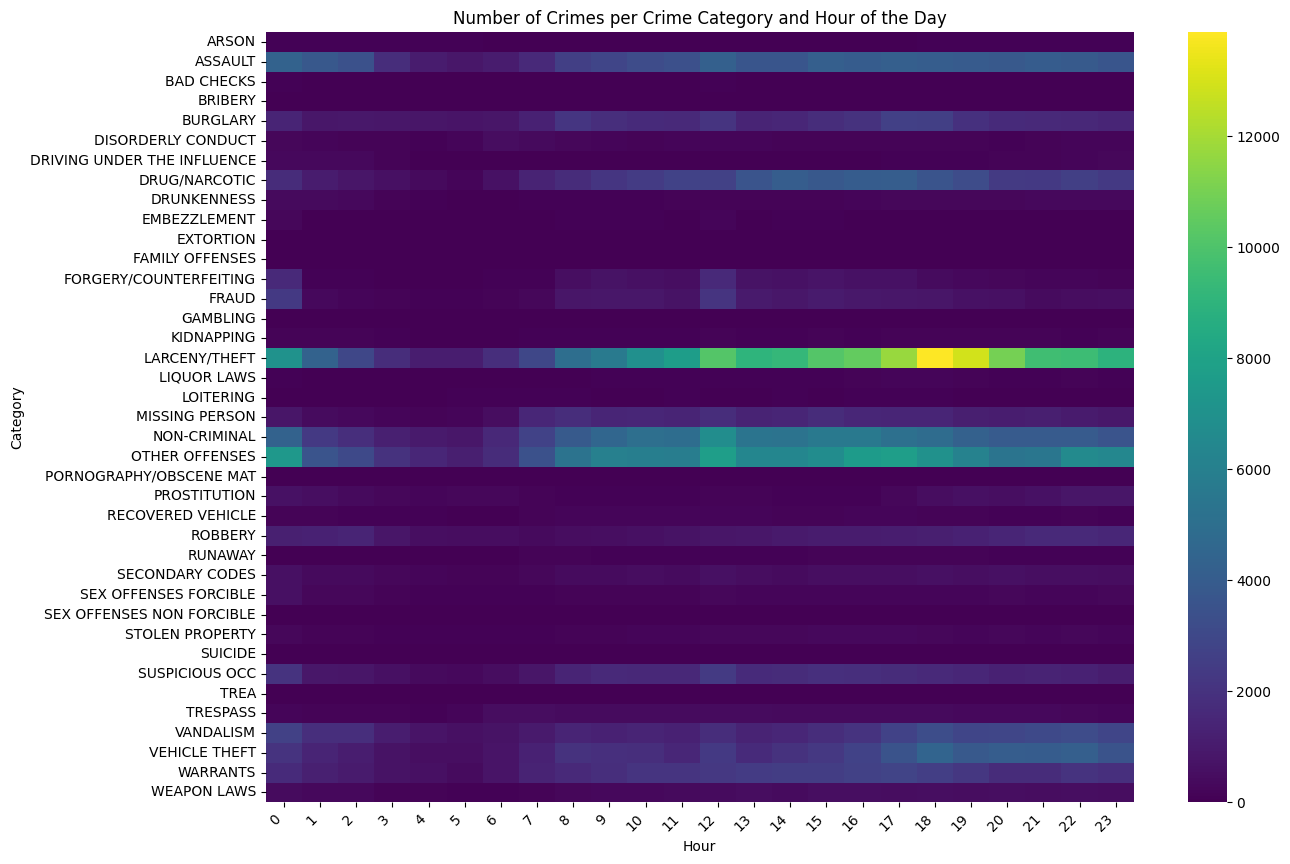

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already defined 'relevant_data' and 'training_data'

# Convert the 'Dates' column to datetime format
training_data['Dates'] = pd.to_datetime(training_data['Dates'])

# Extract the hour information and create a new column
training_data['Hour'] = training_data['Dates'].dt.hour

# Create a pivot table to get the counts of crimes per category and hour
crime_pivot_table_hour = pd.pivot_table(training_data, index="Category", columns="Hour", aggfunc=len, fill_value=0)["Dates"]

# Reorder the columns based on the hour of the day
crime_pivot_table_hour = crime_pivot_table_hour.reindex(sorted(crime_pivot_table_hour.columns), axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 10))
heatmap_hour = sns.heatmap(crime_pivot_table_hour, cmap='viridis')
heatmap_hour.set_xticklabels(heatmap_hour.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_hour.set_yticklabels(heatmap_hour.get_yticklabels(), rotation=0)
plt.title('Number of Crimes per Crime Category and Hour of the Day')
plt.show()